In [4]:
!git clone https://github.com/Wukkkinz-0725/animalImage_classification.git

fatal: destination path 'animalImage_classification' already exists and is not an empty directory.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
import os

# EDA
Class Distribution Analysis:

Evaluate the distribution of images across the super-classes and sub-classes.

Check for imbalances in the dataset; if some classes are underrepresented, it might affect the model's ability to learn from them.

In [6]:
os.chdir('./animalImage_classification/Released_Data')

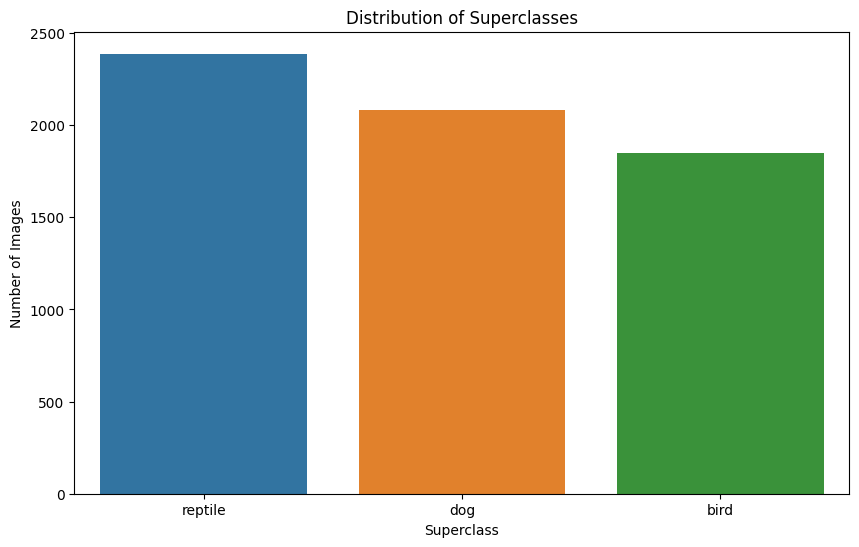

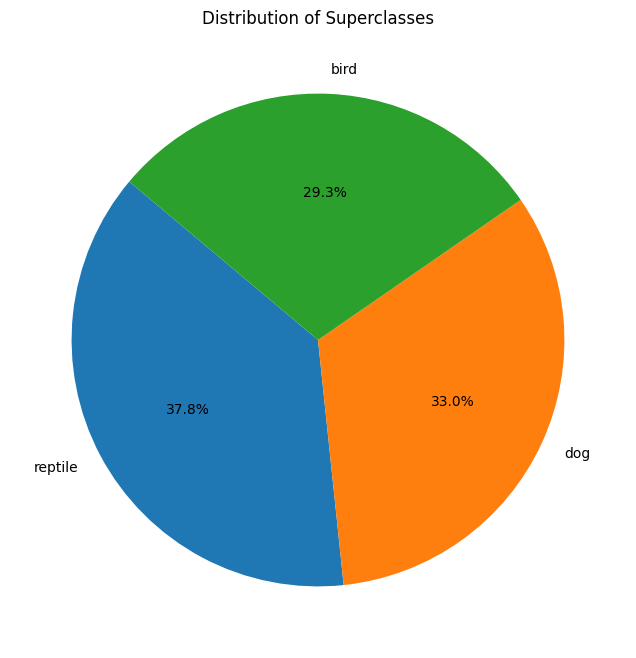

In [7]:
# Load the CSV files
train_data = pd.read_csv('train_data.csv')
subclass_mapping = pd.read_csv('subclass_mapping.csv')
superclass_mapping = pd.read_csv('superclass_mapping.csv')

# Merge the train data with subclass and superclass mappings
train_data = train_data.merge(subclass_mapping, left_on='subclass_index', right_on='index', how='left').rename(columns={'class': 'subclass_name'})
train_data = train_data.merge(superclass_mapping, left_on='superclass_index', right_on='index', how='left').rename(columns={'class': 'superclass_name'})

# Dropping extra columns
train_data.drop(['index_x', 'index_y'], axis=1, inplace=True)

# Class Distribution Analysis
subclass_distribution = train_data['subclass_name'].value_counts()
superclass_distribution = train_data['superclass_name'].value_counts()

# Visualizing the distribution of superclasses
plt.figure(figsize=(10, 6))
sns.barplot(x=superclass_distribution.index, y=superclass_distribution.values)
plt.title('Distribution of Superclasses')
plt.xlabel('Superclass')
plt.ylabel('Number of Images')
plt.show()

# # Visualizing the distribution of subclasses
# plt.figure(figsize=(10, 6))
# sns.barplot(x=subclass_distribution.index, y=subclass_distribution.values)
# plt.title('Distribution of Subclasses')
# plt.xticks(rotation=90)  # Rotate x-labels for better readability
# plt.xlabel('Subclass')
# plt.ylabel('Number of Images')
# plt.show()

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(superclass_distribution, labels=superclass_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Superclasses')
plt.show()


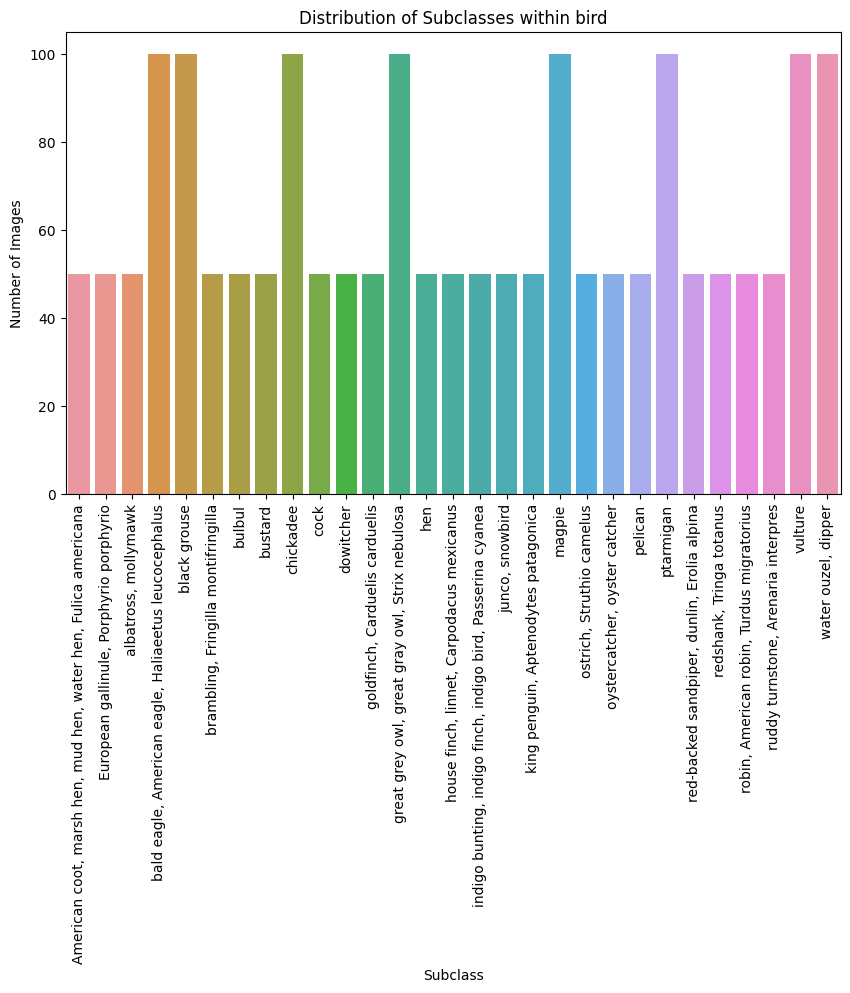

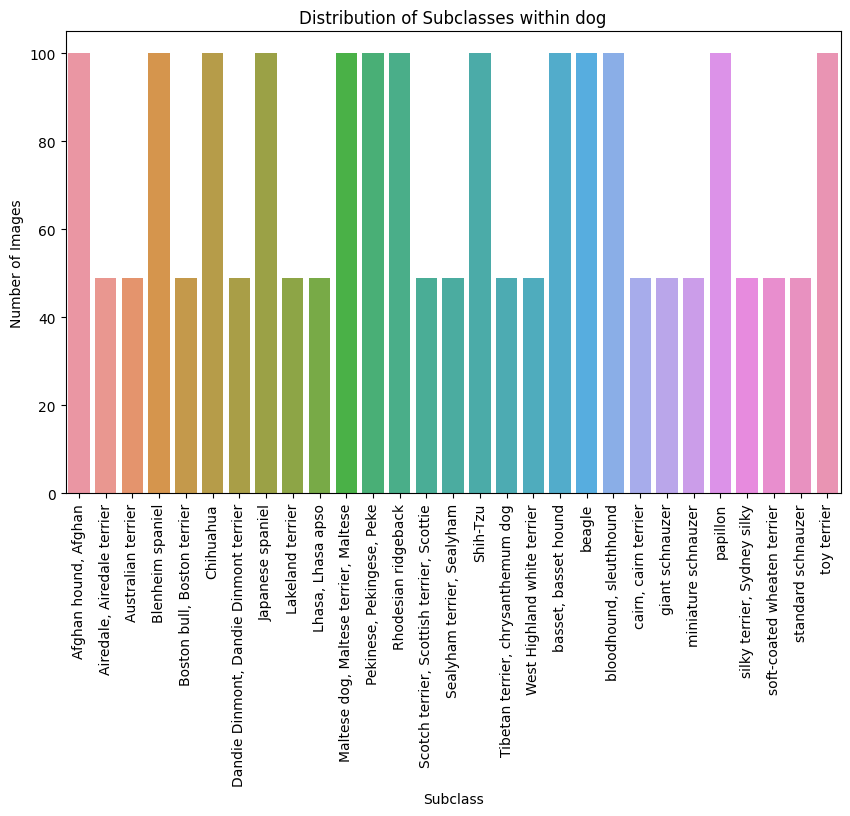

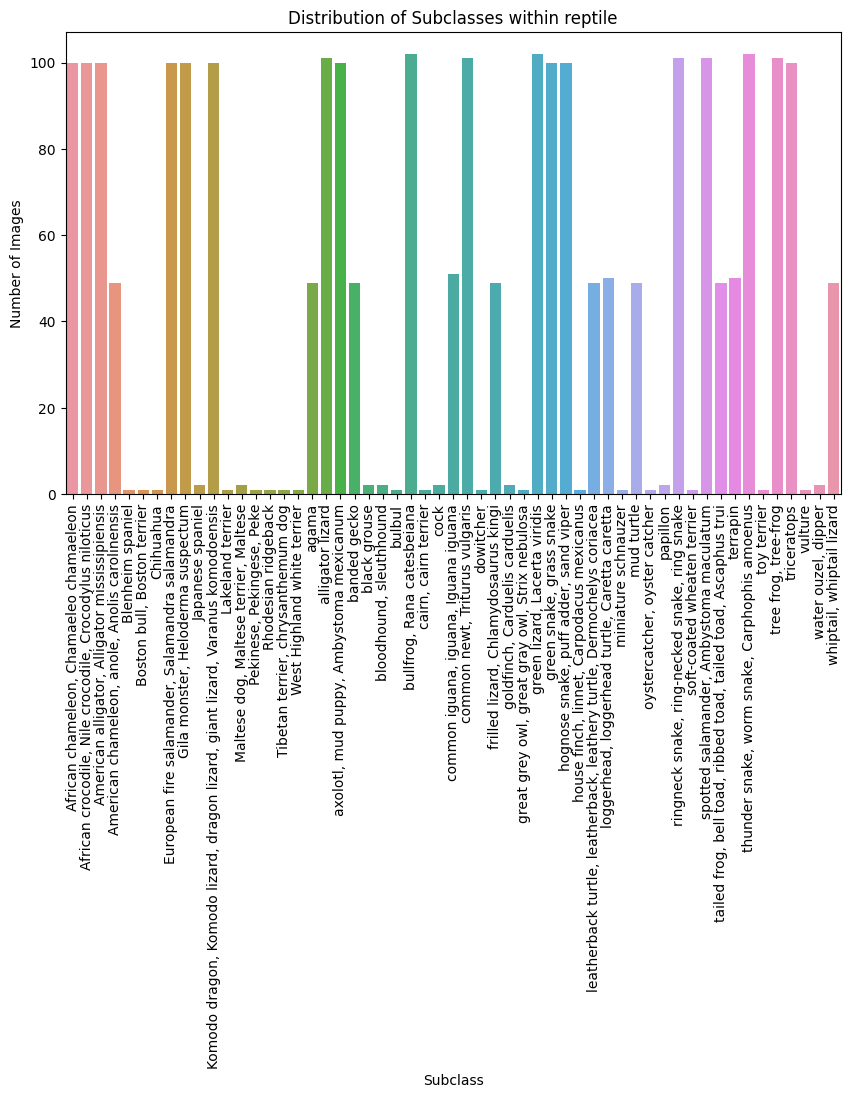

In [8]:
# Load the CSV files
train_data = pd.read_csv('train_data.csv')
subclass_mapping = pd.read_csv('subclass_mapping.csv')
superclass_mapping = pd.read_csv('superclass_mapping.csv')

# Merge the train data with subclass and superclass mappings
train_data = train_data.merge(subclass_mapping, left_on='subclass_index', right_on='index', how='left').rename(columns={'class': 'subclass_name'})
train_data = train_data.merge(superclass_mapping, left_on='superclass_index', right_on='index', how='left').rename(columns={'class': 'superclass_name'})

# Dropping extra columns
train_data.drop(['index_x', 'index_y'], axis=1, inplace=True)

# Group by superclass and then subclass
grouped_data = train_data.groupby(['superclass_name', 'subclass_name']).size().reset_index(name='counts')

# Plotting the distribution of subclasses within each superclass
for superclass in grouped_data['superclass_name'].unique():
    plt.figure(figsize=(10, 6))
    subclass_data = grouped_data[grouped_data['superclass_name'] == superclass]
    sns.barplot(x='subclass_name', y='counts', data=subclass_data)
    plt.title(f'Distribution of Subclasses within {superclass}')
    plt.xticks(rotation=90)  # Rotate x-labels for better readability
    plt.xlabel('Subclass')
    plt.ylabel('Number of Images')
    plt.show()


#Pixel Intensity Analysis
Pixel Intensity Analysis involves examining the distribution of pixel values across your image dataset. This type of analysis can reveal insights about the overall brightness, contrast, and potential need for normalization or other preprocessing steps.

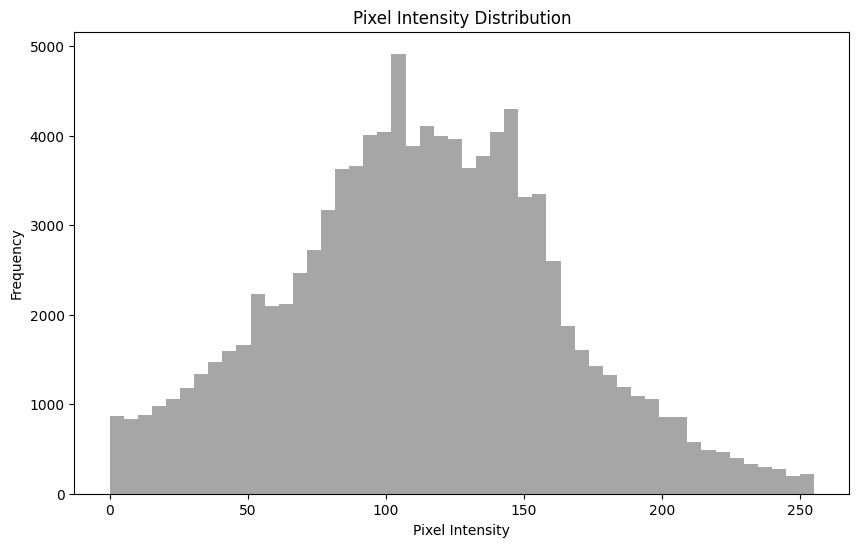

In [12]:
# Load the CSV file containing image paths
train_data = pd.read_csv('train_data.csv')
train_img_dir = 'train_shuffle'

# Initialize a list to store pixel values
pixels = []

# Loop over a subset of images to calculate pixel intensity
for filename in train_data['image'].sample(100):  # Adjust the number as needed
    with Image.open(f'train_shuffle/{filename}') as img:
        img_gray = img.convert('L')  # Convert to grayscale
        pixels.extend(list(img_gray.getdata()))

# Plotting the pixel intensity distribution
plt.figure(figsize=(10, 6))
plt.hist(pixels, bins=50, color='gray', alpha=0.7)
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


The pixel intensity distribution looks like a normal distribution, so it indicates that there is no significant need for global contrast adjustments. We could expect standard normalization techniques (such as subtracting the mean and dividing by the standard deviation) to work well.

# Color Distribution Analysis
Analyze the distribution of pixel intensities across the dataset. This can reveal insights about the contrast and brightness of the images.
Check if there's a need for brightness or contrast adjustment in preprocessing. Analyzing how colors vary across and within the super-classes (bird, dog, reptile) and sub-classes (e.g., different bird species).

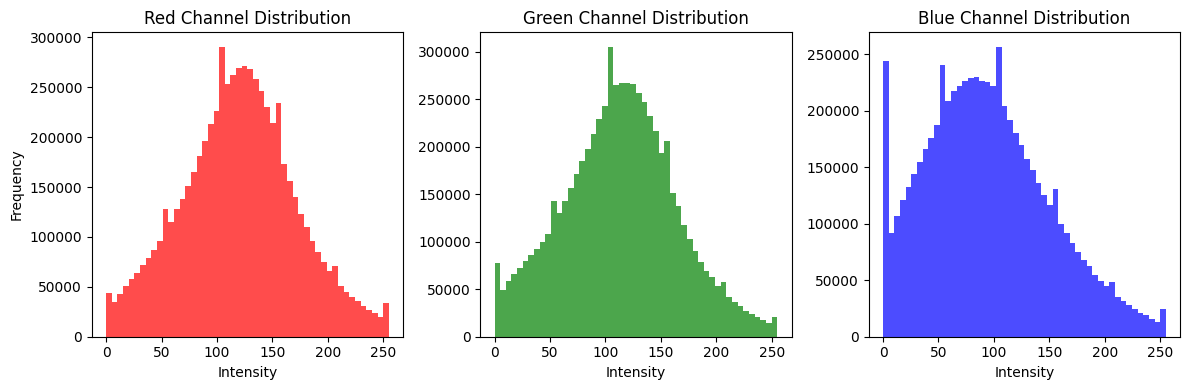

In [15]:
# Overall Analysis

# Load the CSV file containing image paths
train_data = pd.read_csv('train_data.csv')

# Initialize lists to store color values
red_values = []
green_values = []
blue_values = []

# Loop over a subset of images to calculate color distribution
# for filename in train_data['image'].sample(100):  # Adjust the number as needed
for filename in train_data['image']:  # Adjust the number as needed
    with Image.open(f'train_shuffle/{filename}') as img:
        colors = np.array(img)
        red_values.extend(colors[:, :, 0].flatten())   # Extract red channel
        green_values.extend(colors[:, :, 1].flatten()) # Extract green channel
        blue_values.extend(colors[:, :, 2].flatten())  # Extract blue channel

# Plotting the color intensity distribution for each channel
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(red_values, bins=50, color='red', alpha=0.7)
plt.title('Red Channel Distribution')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(green_values, bins=50, color='green', alpha=0.7)
plt.title('Green Channel Distribution')
plt.xlabel('Intensity')

plt.subplot(1, 3, 3)
plt.hist(blue_values, bins=50, color='blue', alpha=0.7)
plt.title('Blue Channel Distribution')
plt.xlabel('Intensity')

plt.tight_layout()
plt.show()


Look for any skews in the distributions. For instance, a skew in the red channel might indicate a prevalence of warmer tones.
Compare the distributions across different super-classes and sub-classes to see if there are distinct color profiles.

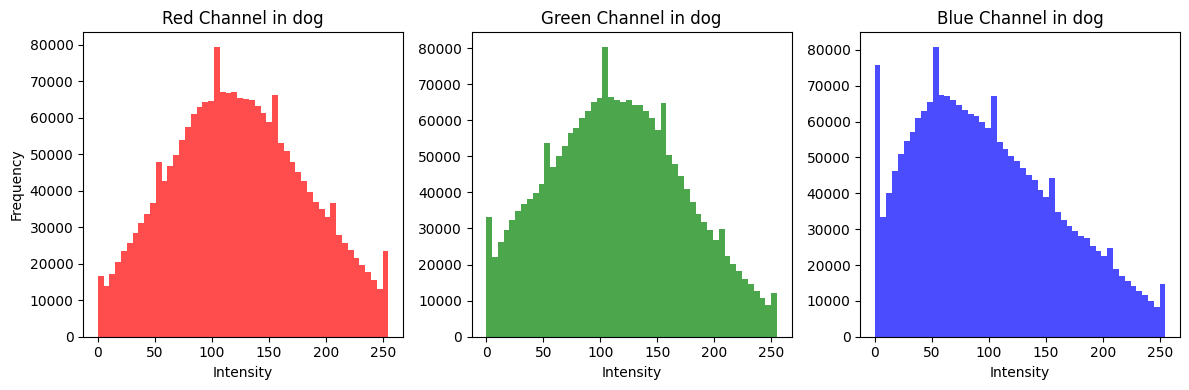

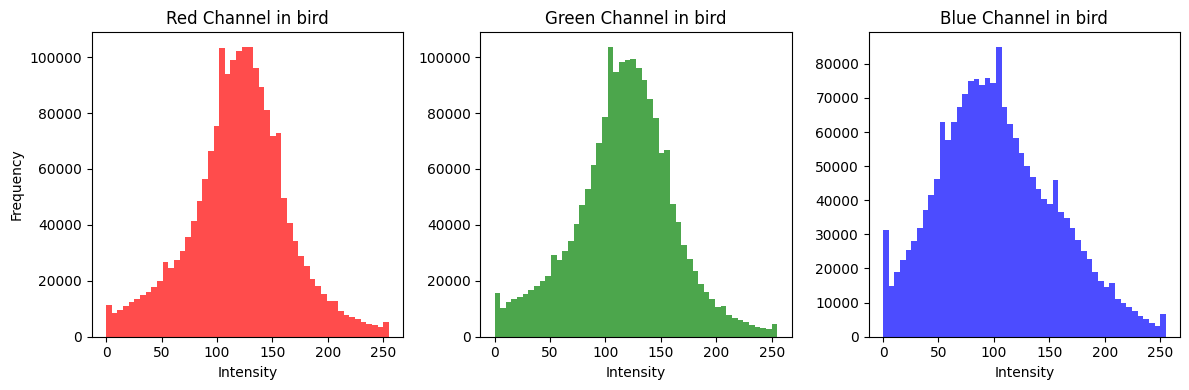

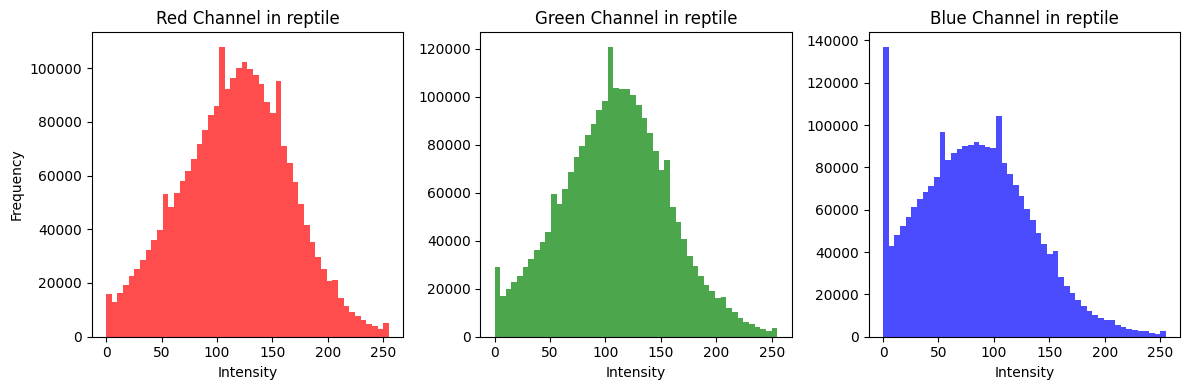

In [16]:
# Analysis for each superclass

# Load the CSV files
train_data = pd.read_csv('train_data.csv')
superclass_mapping = pd.read_csv('superclass_mapping.csv')

# Merge the train data with superclass mapping
train_data = train_data.merge(superclass_mapping, left_on='superclass_index', right_on='index', how='left').rename(columns={'class': 'superclass_name'})
train_data.drop(['index'], axis=1, inplace=True)

# Function to plot color distribution
def plot_color_distribution(data, superclass_name):
    red_values = []
    green_values = []
    blue_values = []

    # Loop over images in the superclass
    for filename in data['image']:
        with Image.open(f'train_shuffle/{filename}') as img:
            # img = img.resize((64, 64))  # Optional: Resize if images are not uniform in size
            colors = np.array(img)
            red_values.extend(colors[:, :, 0].flatten())
            green_values.extend(colors[:, :, 1].flatten())
            blue_values.extend(colors[:, :, 2].flatten())

    # Plotting the color intensity distribution for each channel
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.hist(red_values, bins=50, color='red', alpha=0.7)
    plt.title(f'Red Channel in {superclass_name}')
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')

    plt.subplot(1, 3, 2)
    plt.hist(green_values, bins=50, color='green', alpha=0.7)
    plt.title(f'Green Channel in {superclass_name}')
    plt.xlabel('Intensity')

    plt.subplot(1, 3, 3)
    plt.hist(blue_values, bins=50, color='blue', alpha=0.7)
    plt.title(f'Blue Channel in {superclass_name}')
    plt.xlabel('Intensity')

    plt.tight_layout()
    plt.show()

# Analyze color distribution for each superclass
for superclass in train_data['superclass_name'].unique():
    superclass_data = train_data[train_data['superclass_name'] == superclass]
    plot_color_distribution(superclass_data, superclass)


Insights:

1. Red Channel:
All three superclasses show a similar pattern in the red channel, with a peak intensity around the mid-range (around 100-150). This suggests that, on average, the images are neither too dark nor too bright in the red spectrum.
The dog superclass has a slightly wider distribution compared to the reptile and bird classes, indicating a bit more variation in red tones among the dog images.


2. Green Channel:
The reptile superclass has a notable peak in the green channel, which is higher and sharper than the other two classes. This is expected, as reptiles often have greenish tones in their natural coloration.
The bird and dog superclasses have a more similar distribution in the green channel, with a peak intensity around the mid-range but with less frequency compared to reptiles.


3. Blue Channel:
The bird superclass shows a higher frequency of pixels in the mid-to-high range of the blue channel, which could be due to the sky or water backgrounds commonly associated with bird images or the blue coloration found in some bird species.
Both dog and reptile superclasses show a more moderate distribution in the blue channel, with the intensity peaking around the mid-range and less frequency at the high end compared to birds.

General Observations:
* There's a general trend of the intensity values peaking around the mid-range (100-150) for all three channels across all superclasses, suggesting a balanced exposure in the dataset.
* The sharper peaks in the green channel for reptiles and the blue channel for birds suggest these colors are more defining characteristics for these superclasses.
* The broader distributions in the red and blue channels for dogs indicate a wider variety of colors and possibly environments in which the dogs are pictured.

Considerations for Model Training:
* The distinct green peak for reptiles might be a useful feature for models to learn and could be emphasized during preprocessing or feature extraction.
* The variability in red tones for dogs could either be a feature to leverage if it corresponds to different breeds or a challenge if it introduces noise.
* For birds, the blue channel might be particularly informative, and ensuring that models can capture this variance might improve classification performance.


These color distributions can be used to tailor preprocessing steps, such as color normalization or enhancement, which may help improve model performance, especially for color-sensitive classes. Additionally, they can inform data augmentation strategies, such as emphasizing certain color channels for specific superclasses to increase model robustness to color variations.

Random Brightness Adjustment:

Adjust the brightness of the images randomly within a certain range. This can help the model generalize better to images with different lighting conditions.
Random Contrast Adjustment:

Similar to brightness, adjusting the contrast can help the model be less sensitive to variations in contrast that might occur due to different image capture conditions.
Hue and Saturation Adjustments:

Randomly adjusting the hue can change the color of the images, helping the model to not rely too heavily on specific color cues.
Saturation adjustments can either desaturate or increase the color intensity, which can be particularly useful since you noticed significant peaks in color distribution for the reptiles and birds.
Color Jitter:

This involves randomly changing the brightness, contrast, saturation, and hue of an image, which can make your model more robust to a variety of color variations.
Channel Shifting:

Shift the values in a particular channel. For example, if reptiles have a strong green component, you might shift the green channel slightly to create variations of the images that still look natural but have different green intensities.
Random Grayscale:

Convert images to grayscale with a certain probability. This can force the model to focus more on texture and shape rather than relying solely on color.
Selective Augmentation Based on Superclass:

For superclasses that show a strong presence in a particular channel (like reptiles in the green channel), you could selectively apply more aggressive augmentation on that specific channel.

from torchvision import transforms

# Define your transforms for data augmentation
data_augmentation = transforms.Compose([
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomGrayscale(p=0.1),
    # Additional transforms like random rotation, flipping, etc., can be added here
])

# Apply the transformations to your dataset
# Assuming 'dataset' is a PyTorch Dataset object containing your images
augmented_dataset = [data_augmentation(image) for image in dataset]


Remember, the exact parameters you use for augmentation should be chosen based on experimentation and the specific requirements of your dataset and task. It is often helpful to visualize a few augmented images to ensure they still look natural and are representative of the variations you expect in the real world.